In [45]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import iqr
import matplotlib.patches as mpatches

In [46]:
# Load heart data set into pandas
heart_df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [47]:
#Check for empty spots
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


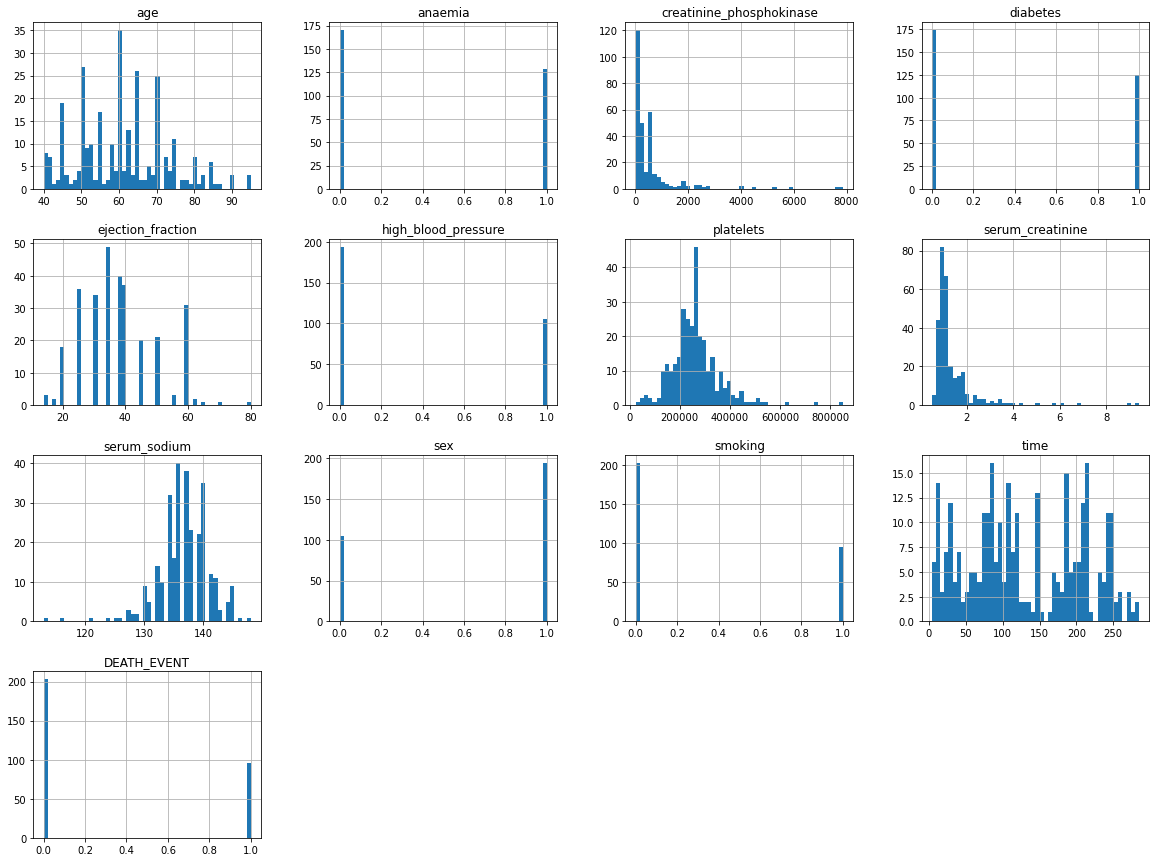

In [48]:
heart_df.hist(bins=50, figsize=(20,15))
plt.show()

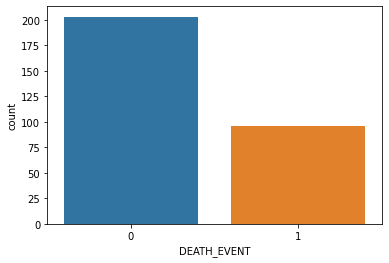

In [49]:
#"Death_Event" represents if the patient died during the follow up period.
#0 = living | 1 = deceased

death = heart_df['DEATH_EVENT']
sns.countplot(x=death)
plt.show()

In [50]:
# Male patients that encountered a death event
male_death = heart_df[(heart_df['sex'] == 1) & (heart_df['DEATH_EVENT'] == 1)]
num_male_deaths = len(male_death)
print(f"The number of males that had a death event: {num_male_deaths}")

The number of males that had a death event: 62


In [51]:
# Female patients that encountered a death event
female_death = heart_df[(heart_df['sex'] == 0) & (heart_df['DEATH_EVENT'] == 1)]
num_female_deaths = len(female_death)
print(f"The number of females that had a death event: {num_female_deaths}")

The number of females that had a death event: 34


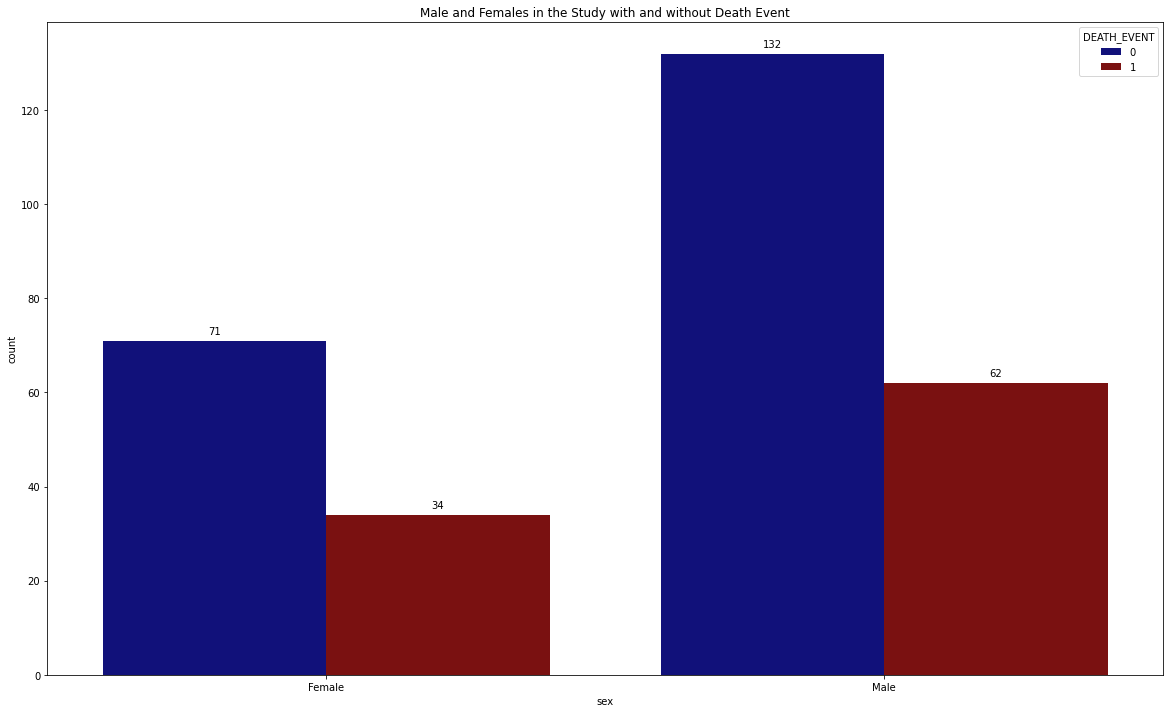

The percentage of male patients is 64.88%
The percentage of deaths that were male is 64.58%
The percentage of female patients is 35.12%
The percentage of deaths that were female is 35.42%


In [52]:
plt.figure(figsize=(20,12))
cols= ["darkblue","darkred"]

# Creating the countplot
ax = sns.countplot(x=heart_df['sex'], data=heart_df, hue="DEATH_EVENT", palette=cols)

# Changing the x-axis labels from 0,1 to Female, Male
ax.set_xticklabels(['Female', 'Male'])

# Adding text labels to the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

# Set the title of the plot
ax.set_title("Male and Females in the Study with and without Death Event")

# Display the plot
plt.show()

# Display calculated percentages
for index, row in result_df.iterrows():
    if row['sex'] == 'Male':
        print(f"The percentage of male patients is {row['total_percentage']:.2f}%")
        print(f"The percentage of deaths that were male is {row['death_total_percentage']:.2f}%")
    else:
        print(f"The percentage of female patients is {row['total_percentage']:.2f}%")
        print(f"The percentage of deaths that were female is {row['death_total_percentage']:.2f}%")

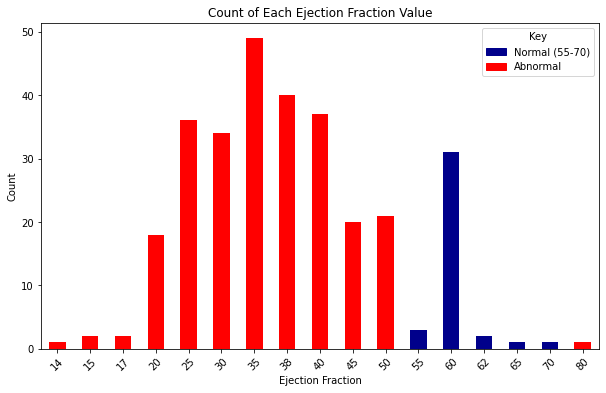

Ejection fraction (EF) is a measurement used to assess how well your heart is pumping blood.
 
It is expressed as a percentage and represents the proportion of blood that is ejected from the heart's left ventricle with each contraction.

Normal Range: A normal ejection fraction typically ranges from 55% to 70%. This means that 55% to 70% of the blood in the left ventricle is pumped out with each heartbeat.

Low Ejection Fraction:** An ejection fraction below 55% may indicate heart failure or cardiomyopathy. When the EF drops below 40%, it is often considered a marker of systolic heart failure.

The majority of these patients have ejection fractions of less than the normal range.


In [53]:
ejection_fraction_counts = heart_df['ejection_fraction'].value_counts()

# Sort the ejection fractions by value
ejection_fraction_counts = ejection_fraction_counts.sort_index()

# Define the color mapping
colors = ['darkblue' if 55 <= value <= 70 else 'red' for value in ejection_fraction_counts.index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ejection_fraction_counts.plot(kind='bar', color=colors)
normal_patch = mpatches.Patch(color='darkblue', label='Normal (55-70)')
abnormal_patch = mpatches.Patch(color='red', label='Abnormal')
plt.legend(handles=[normal_patch, abnormal_patch], title='Key')
plt.title('Count of Each Ejection Fraction Value')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

print("""Ejection fraction (EF) is a measurement used to assess how well your heart is pumping blood.\n 
It is expressed as a percentage and represents the proportion of blood that is ejected from the heart's left ventricle with each contraction.\n
Normal Range: A normal ejection fraction typically ranges from 55% to 70%. This means that 55% to 70% of the blood in the left ventricle is pumped out with each heartbeat.\n
Low Ejection Fraction:** An ejection fraction below 55% may indicate heart failure or cardiomyopathy. When the EF drops below 40%, it is often considered a marker of systolic heart failure.\n
The majority of these patients have ejection fractions of less than the normal range.""")


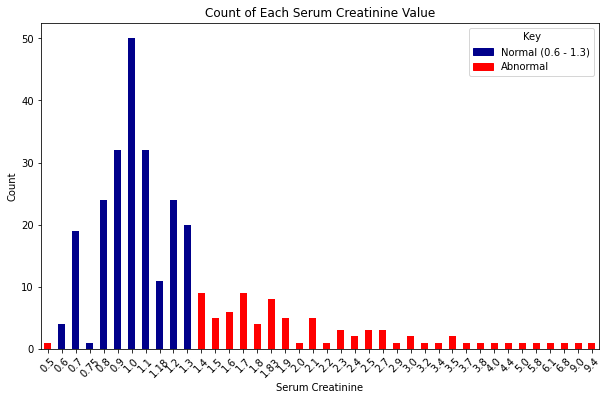

Serum creatinine is a blood test that measures the level of creatinine in your blood. 

Creatinine is a waste product produced by muscles from the breakdown of a compound called creatine. 
 
Normal Range: The normal range of serum creatinine varies slightly depending on age, sex, and muscle mass. 

Generally, for adult men, it is about 0.7 to 1.3 milligrams per deciliter (mg/dL), 

and for adult women, it is about 0.6 to 1.1 mg/dL.


In [54]:
serum_counts = heart_df['serum_creatinine'].value_counts()

# Sort the ejection fractions by value
serum_counts = serum_counts.sort_index()

# Define the color mapping
colors = ['darkblue' if 0.6 <= value <= 1.3 else 'red' for value in serum_counts.index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
serum_counts.plot(kind='bar', color = colors)
normal_patch = mpatches.Patch(color='darkblue', label='Normal (0.6 - 1.3)')
abnormal_patch = mpatches.Patch(color='red', label='Abnormal')
plt.legend(handles=[normal_patch, abnormal_patch], title='Key')
plt.title('Count of Each Serum Creatinine Value')
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("""Serum creatinine is a blood test that measures the level of creatinine in your blood. \n
Creatinine is a waste product produced by muscles from the breakdown of a compound called creatine. \n 
Normal Range: The normal range of serum creatinine varies slightly depending on age, sex, and muscle mass. \n
Generally, for adult men, it is about 0.7 to 1.3 milligrams per deciliter (mg/dL), \n
and for adult women, it is about 0.6 to 1.1 mg/dL.""")

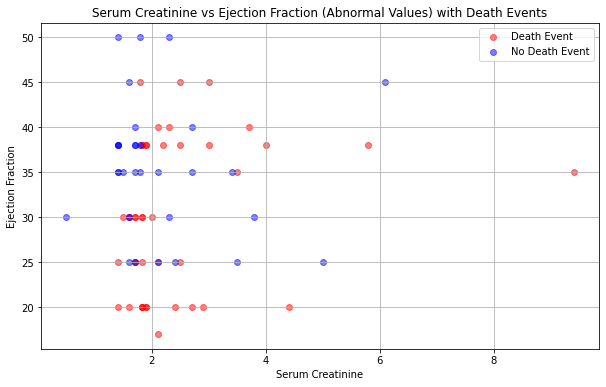

In [56]:
# Filter the DataFrame for abnormal Serum Creatinine and Ejection Fraction values
filtered_df_abnormal = heart_df[
    (~heart_df["serum_creatinine"].between(0.6, 1.3)) & 
    (~heart_df["ejection_fraction"].between(55, 70))
]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for abnormal values that resulted in death
plt.scatter(filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 1]["serum_creatinine"],
            filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 1]["ejection_fraction"],
            c='red', label='Death Event', alpha=0.5)

# Scatter plot for abnormal values that did not result in death
plt.scatter(filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 0]["serum_creatinine"],
            filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 0]["ejection_fraction"],
            c='blue', label='No Death Event', alpha=0.5)

plt.title('Serum Creatinine vs Ejection Fraction (Abnormal Values) with Death Events')
plt.xlabel('Serum Creatinine')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.grid(True)
plt.show()